In [584]:
from understatscraper import Understat
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from mplsoccer.pitch import Pitch, VerticalPitch
from matplotlib import dates
import seaborn as sns

In [2]:
understat = Understat()

### Enes Ünal -  Getafe

In [3]:
# Getafe match ids

ids = [17136,17154,17162,17167,17184,17187,17205,17214,17221,17232,17244,17253,17265,17269,17279,17289,17296,17310,
      17323,17333,17342,17352,17361,17367,17379,17389,17401,17410,17417,17431,17441,17450,17458,17469,17481,17489,17501,17515]
ids = [str(x) for x in ids]

In [4]:
# creating dataframe

df = pd.DataFrame()
for x in ids:
    df_getafe = understat.single_match(x)
    df = df.append(df_getafe)

In [5]:
enes = df[df.player == 'Enes Ünal']

In [6]:
enes[['X','Y','xG']] = enes[['X','Y','xG']].apply(pd.to_numeric,axis=1)

In [7]:
enes['date'] = pd.to_datetime(enes['date'])

In [8]:
enes['xg_cumulative'] = enes['xG'].cumsum()

In [9]:
enes['goal'] = np.where(enes['result']=='Goal',1,0)
enes['goal_cumulative'] = enes['goal'].cumsum()

### xG flow chart

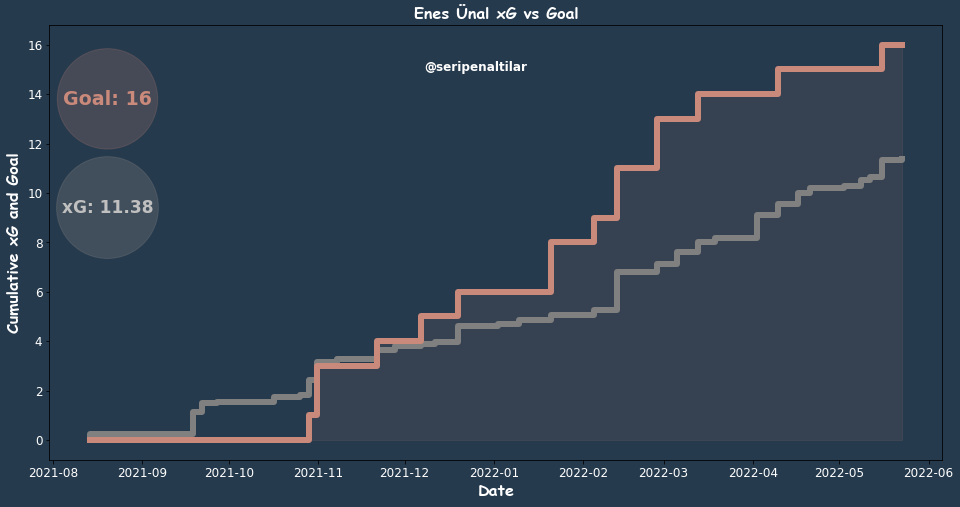

In [81]:
fig,ax = plt.subplots(figsize=(16,8))

ax.step(x=enes['date'],y=enes['xg_cumulative'],c="#808080",linewidth=6)
ax.step(x=enes['date'],y=enes['goal_cumulative'],c="#c9897b",linewidth=6)

ax.set_facecolor(color='#263a4d')
fig.patch.set_facecolor('#263a4d')

plt.fill_between(enes['date'],enes['goal_cumulative'],alpha=0.1,color="#c9897b",step='pre') 
#step is to fill below entire line


plt.text(0.065, 0.83, "Goal: {}".format(round(enes['goal_cumulative'].max(),2)), size=19,
         ha="center", va="center",transform=ax.transAxes,
         color="#c9897b",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#c9897b',alpha=0.20)
         )

#transform is to normalize the circle with the figure

plt.text(0.065, 0.58, "xG: {}".format(round(enes['xg_cumulative'].max(),2)), size=17,
         ha="center", va="center",transform=ax.transAxes,
         color="#C0C0C0",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#808080',alpha=0.30)
         )

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.xlabel('Date',fontdict=font)
plt.ylabel('Cumulative xG and Goal', fontdict=font)
plt.xticks(fontsize=12,c='white')
plt.yticks(fontsize=12,c='white')
plt.title('Enes Ünal xG vs Goal',fontdict=font)
plt.grid(False)

#formatter = dates.DateFormatter('%Y-%m')
#ax.xaxis.set_major_formatter(formatter)
#plt.gcf().autofmt_xdate(rotation=90)
#ax.xaxis.set_major_locator(dates.DayLocator(interval=30))

plt.figtext(0.45,0.8,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)

plt.show()

### Shotmap

In [11]:
enes[['X','Y']] = enes[['X','Y']]*100

In [12]:
enes['result'].value_counts()

MissedShots    32
BlockedShot    24
Goal           16
SavedShot      12
ShotOnPost      2
Name: result, dtype: int64

In [13]:
xG_per_shot = round(enes['xG'].sum()/len(enes),2)

In [14]:
conversion = round(len(enes[enes['result']=='Goal'])/len(enes),2)

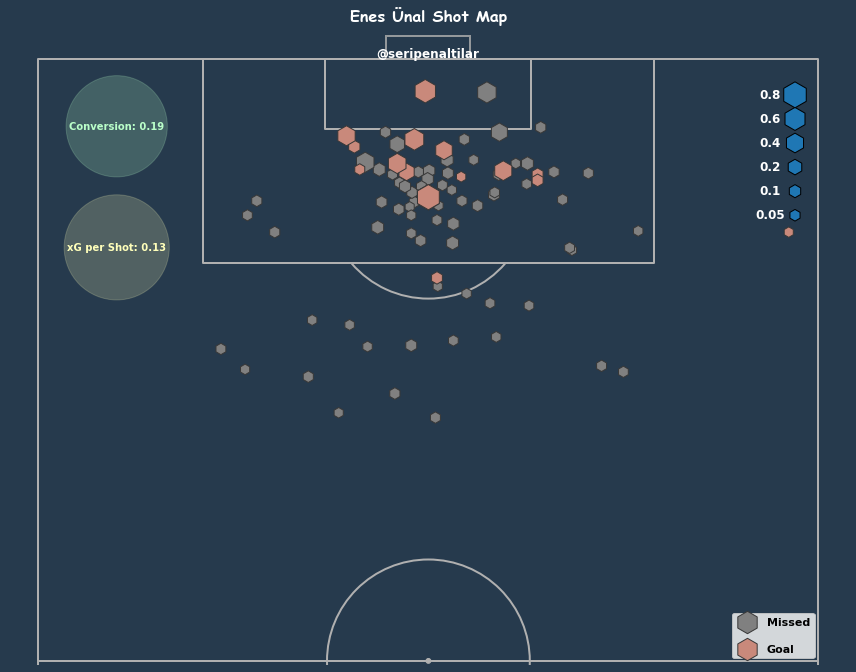

In [19]:
pitch = VerticalPitch(pad_bottom=0.5,
                     half=True,
                     goal_type='box',
                     goal_alpha=0.8,
                     pitch_type='opta',
                     pitch_color='#263a4d'
                     )

fig,ax = pitch.draw(figsize=(12,10))

fig.patch.set_facecolor('#263a4d')


re1 = pitch.scatter(enes[enes['result']!='Goal']['X'],enes[enes['result']!='Goal']['Y'],s=(enes[enes['result']!='Goal']['xG']*720)+100,
                   c='#808080',marker='h',edgecolors='#383838',ax=ax,label='Missed')

re = pitch.scatter(enes[enes['result']=='Goal']['X'],enes[enes['result']=='Goal']['Y'],s=(enes[enes['result']=='Goal']['xG']*720)+100,
                   c='#c9897b',marker='h',edgecolors='#383838',ax=ax,label='Goal')

#legends

legend = ax.legend(bbox_to_anchor=(0.965,0.09),labelspacing=1.5,prop={'weight':'bold','size':11})
legend.legendHandles[0]._sizes = [500]
legend.legendHandles[1]._sizes = [500]


mSize = [0.05,0.10,0.2,0.4,0.6,0.8]
mSizeS = [720 * i for i in mSize]
mSizeS = [100 + i for i in mSizeS]

mx = [3,3,3,3,3,3]
my = [87,89,91,93,95,97]

plt.scatter(mx,my,s=mSizeS,edgecolor='black',marker='h')
for i in range(len(mx)):
    plt.text(mx[i]+3.2,my[i],mSize[i],fontsize=12,c='white',ha='center',va='center',fontweight='bold')

plt.figtext(0.44,0.9,'@seripenaltilar',fontweight='bold',fontsize=12,color='white')
font = {'family': 'Comic Sans MS',
       'color': 'black',
       'weight': 'bold',
       'size': 16
       }

plt.text(0.13, 0.8450, "Conversion: {}".format(conversion), size=10,
         ha="center", va="center",transform=ax.transAxes,
         color="#baffc9",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#baffc9',alpha=0.20)
         )

plt.text(0.13, 0.6550, "xG per Shot: {}".format(xG_per_shot), size=10,
         ha="center", va="center",transform=ax.transAxes,
         color="#ffffba",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#ffffba',alpha=0.20)
         )

plt.title('Enes Ünal Shot Map',fontdict=font,color='white')

plt.show()

In [59]:
enes[enes['result']=='Goal']['situation'].value_counts()

OpenPlay      9
FromCorner    4
Penalty       2
SetPiece      1
Name: situation, dtype: int64

In [64]:
enes[enes['result']=='Goal']['shotType'].value_counts()

RightFoot    11
Head          4
LeftFoot      1
Name: shotType, dtype: int64

### Functions

### Creating dataframe

In [282]:
def dataframe(player,ids=ids):
    # player must be string
    understat = Understat() 
    df = pd.DataFrame()
    for x in ids:
        df_x = understat.single_match(x)
        df = df.append(df_x)
        
    df = df[df.player == player] # choosing player
    
    df[['X','Y','xG']] = df[['X','Y','xG']].apply(pd.to_numeric,axis=1)
    df['date'] = pd.to_datetime(df['date'])
    df['xg_cumulative'] = df['xG'].cumsum()
    df['goal'] = np.where(df['result']=='Goal',1,0)
    df['goal_cumulative'] = df['goal'].cumsum()
    df[['X','Y']] = df[['X','Y']]*100
    
    return df

### Creating xG flow

In [229]:
def xg(df,player):
    
    fig,ax = plt.subplots(figsize=(16,8))
    
    ax.step(x=df['date'],y=df['xg_cumulative'],c="#808080",linewidth=6)
    ax.step(x=df['date'],y=df['goal_cumulative'],c="#c9897b",linewidth=6)

    ax.set_facecolor(color='#263a4d')
    fig.patch.set_facecolor('#263a4d')

    plt.fill_between(df['date'],df['goal_cumulative'],alpha=0.1,color="#c9897b",step='pre') 
    #step is to fill below entire line


    plt.text(0.065, 0.83, "Goal: {}".format(round(df['goal_cumulative'].max(),2)), size=19,
         ha="center", va="center",transform=ax.transAxes,
         color="#c9897b",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#c9897b',alpha=0.20)
         )

    #transform is to normalize the circle with the figure

    plt.text(0.065, 0.58, "xG: {}".format(round(df['xg_cumulative'].max(),1)), size=18,
         ha="center", va="center",transform=ax.transAxes,
         color="#C0C0C0",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#808080',alpha=0.30)
         )

    font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

    plt.xlabel('Date',fontdict=font)
    plt.ylabel('Cumulative xG and Goal', fontdict=font)
    plt.xticks(fontsize=12,c='white')
    plt.yticks(fontsize=12,c='white')
    plt.title(player + ' xG vs Goal',fontdict=font)
    plt.grid(False)

    plt.figtext(0.45,0.8,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)

    plt.show()
    

### Creating Shot map

In [362]:
def shotmap(df,player):
    
    
    xG_per_shot = round(df['xG'].sum()/len(df),2)
    conversion = round(len(df[df['result']=='Goal'])/len(df),2)
    
    pitch = VerticalPitch(pad_bottom=0.5,
                     half=True,
                     goal_type='box',
                     goal_alpha=0.8,
                     pitch_type='opta',
                     pitch_color='#263a4d'
                     )

    fig,ax = pitch.draw(figsize=(12,10))

    fig.patch.set_facecolor('#263a4d')


    re = pitch.scatter(df[df['result']!='Goal']['X'],df[df['result']!='Goal']['Y'],
                       s=(df[df['result']!='Goal']['xG']*720)+100,
                   c='#808080',marker='h',edgecolors='#383838',ax=ax,label='Missed')

    re1 = pitch.scatter(df[df['result']=='Goal']['X'],df[df['result']=='Goal']['Y'],
                        s=(df[df['result']=='Goal']['xG']*720)+100,
                   c='#c9897b',marker='h',edgecolors='#383838',ax=ax,label='Goal')

    #legends

    legend = ax.legend(bbox_to_anchor=(0.965,0.09),labelspacing=1.5,prop={'weight':'bold','size':11})
    legend.legendHandles[0]._sizes = [500]
    legend.legendHandles[1]._sizes = [500]


    mSize = [0.05,0.10,0.2,0.4,0.6,0.8]
    mSizeS = [720 * i for i in mSize]
    mSizeS = [100 + i for i in mSizeS]

    mx = [3,3,3,3,3,3]
    my = [87,89,91,93,95,97]

    plt.scatter(mx,my,s=mSizeS,edgecolor='black',marker='h')
    for i in range(len(mx)):
        plt.text(mx[i]+3.2,my[i],mSize[i],fontsize=12,c='white',ha='center',va='center',fontweight='bold')

    plt.figtext(0.44,0.9,'@seripenaltilar',fontweight='bold',fontsize=12,color='white')
    font = {'family': 'Comic Sans MS',
       'color': 'black',
       'weight': 'bold',
       'size': 16
       }

    plt.text(0.13, 0.8450, "Conversion: {}".format(conversion), size=10,
         ha="center", va="center",transform=ax.transAxes,
         color="#baffc9",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#baffc9',alpha=0.20)
         )

    plt.text(0.13, 0.6550, "xG per Shot: {}".format(xG_per_shot), size=10,
         ha="center", va="center",transform=ax.transAxes,
         color="#ffffba",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#ffffba',alpha=0.20)
         )

    plt.title(player + ' Shot Map',fontdict=font,color='white')

    plt.show()

### Cengiz Ünder - Marseille 21/22

In [90]:
# match ids has to be manually added
# Marseille match ids 2021-2022

ids = [17831,17841,17854,17871,17877,17883,17896,17904,17916,17925,17851,17935,17946,17968,17977,17987,17992,
      18006,18016,18023,18036,17955,18046,18061,18071,18072,18089,18093,18106,18119,18128,18138,18147,18159,
      18164,18177,18186,18195]

ids = [str(x) for x in ids]

In [52]:
df = dataframe('Cengiz Ünder')

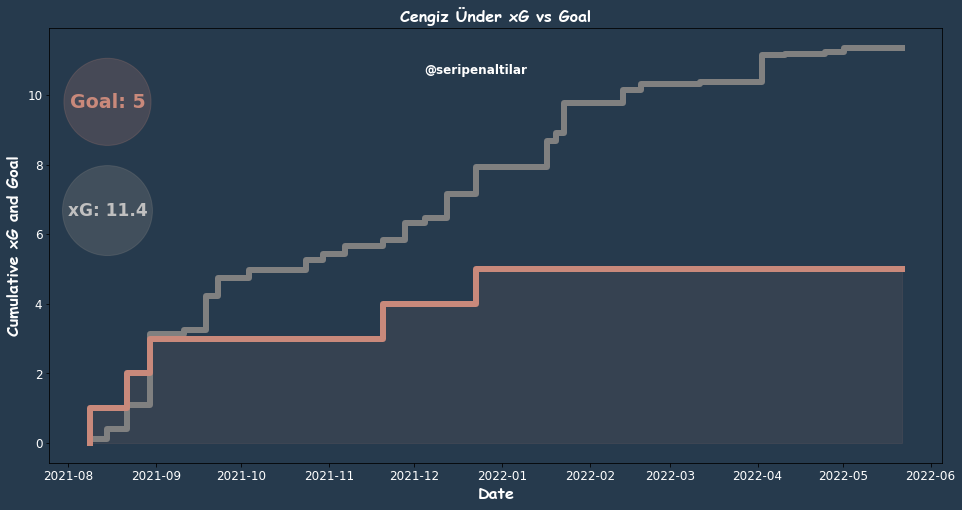

In [99]:
xg(df,'Cengiz Ünder')

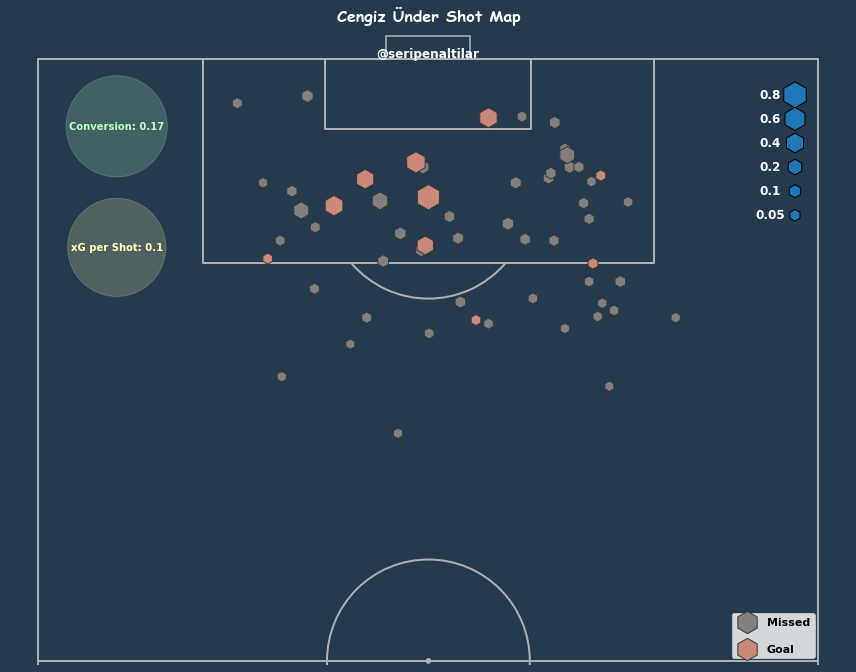

In [55]:
shotmap(df,'Cengiz Ünder')

In [56]:
df[df['result']=='Goal']['situation'].value_counts()

OpenPlay      8
FromCorner    1
Penalty       1
Name: situation, dtype: int64

In [57]:
df[df['result']=='Goal']['shotType'].value_counts()

LeftFoot     9
RightFoot    1
Name: shotType, dtype: int64

### Burak Yilmaz - Lille 21/22

In [91]:
# match ids has to be manually added
# Lille match ids 2021-2022

ids = [17830,17833,17844,17860,17867,17876,17891,17900,17904,17914,17923,17939,17944,17961,17966,17979,17982,17995,
      18002,18023,18020,18034,18044,18055,18067,18079,18087,18095,18111,18113,18122,18132,18149,18153,18169,
      18179,18187,18193]

ids = [str(x) for x in ids]

In [136]:
df = dataframe('Burak Yilmaz')

In [137]:
df.reset_index(inplace=True) # Burak Yilmaz has 4 goal this season source Ligue 1 website
# goal against Metz was an own-goal

In [138]:
df.drop(index=1,inplace=True)

In [139]:
df['xg_cumulative'] = df['xG'].cumsum()
df['goal'] = np.where(df['result']=='Goal',1,0) 
df['goal_cumulative'] = df['goal'].cumsum()

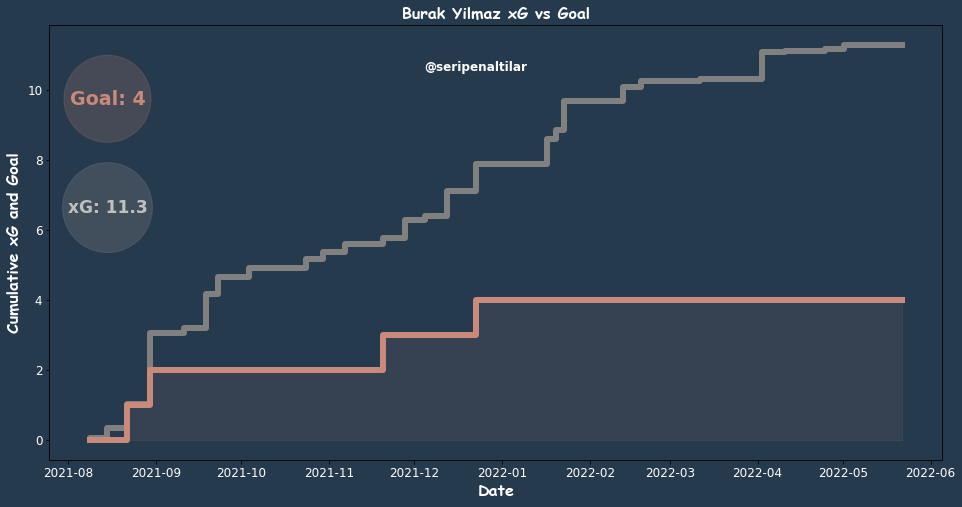

In [142]:
xg(df,'Burak Yilmaz')

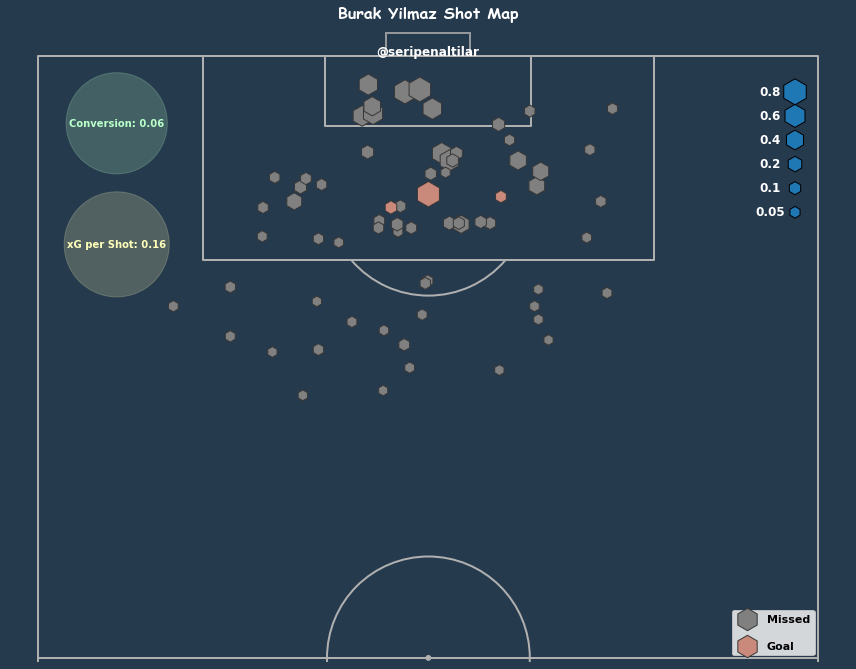

In [141]:
shotmap(df,'Burak Yilmaz')

In [127]:
df[df['result']=='Goal']['situation'].value_counts()

OpenPlay    2
Penalty     2
Name: situation, dtype: int64

In [128]:
df[df['result']=='Goal']['shotType'].value_counts()

RightFoot    3
LeftFoot     1
Name: shotType, dtype: int64

### Hakan Calhanoglu - Inter 21/22

In [153]:
ids1 = [16757,16767,16783,16789,16799,16808,16824,16830,16840,16847,16861,16870,16881,16895,16901,16912,16919,16932,
      16939,16960,16966,16980,16989,17002,17009,17018,17030,17044,17050,17059,17070,17084,17090,16947,17105,17109,17117,
      17129]

ids1 = [str(x) for x in ids]

In [155]:
df = dataframe(player='Hakan Calhanoglu',ids=ids1)

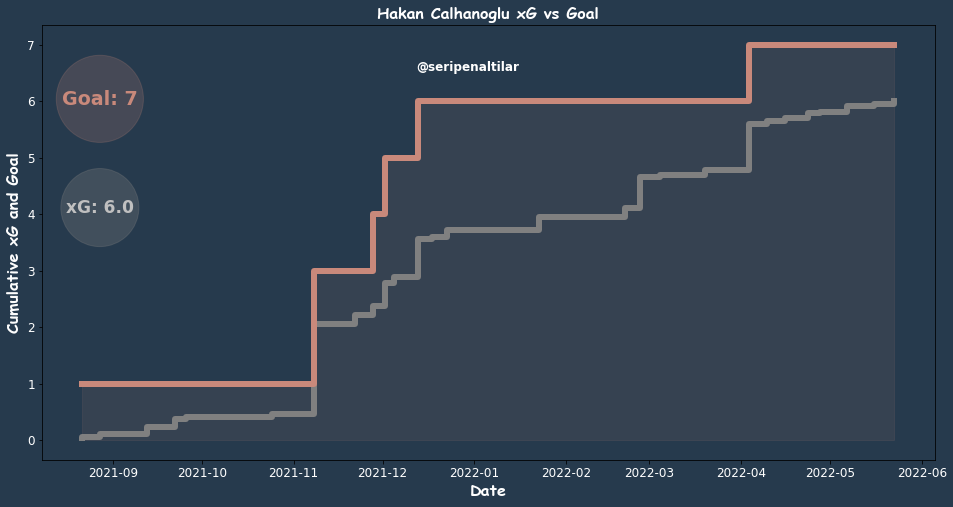

In [156]:
xg(df,'Hakan Calhanoglu')

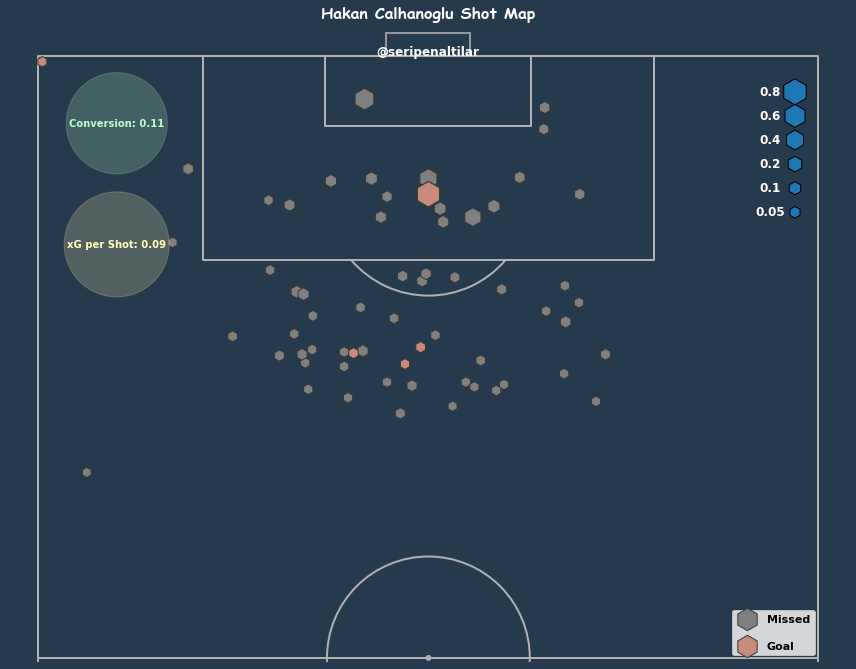

In [157]:
shotmap(df,'Hakan Calhanoglu')

In [162]:
df[df['result']=='Goal']['situation'].value_counts()

OpenPlay      3
Penalty       3
FromCorner    1
Name: situation, dtype: int64

In [166]:
df[df['result']=='Goal']['shotType'].value_counts()

RightFoot    7
Name: shotType, dtype: int64

### Sadio Mane - Liverpool

In [217]:
seasons = [2015,2016,2017,2018,2019,2020,2021]

### Extracting data from seasons

In [289]:
def season(player,team,league,seasons=seasons):
    # player must be string
    understat = Understat() 
    df = pd.DataFrame()
    for x in seasons:
        df_s = understat.season(league,x,team=team,player=player)
        df = df.append(df_s)
    
    df[['X','Y','xG']] = df[['X','Y','xG']].apply(pd.to_numeric,axis=1)
    df['date'] = pd.to_datetime(df['date'])
    df['xg_cumulative'] = df['xG'].cumsum()
    df['goal'] = np.where(df['result']=='Goal',1,0)
    df['goal_cumulative'] = df['goal'].cumsum()
    df[['X','Y']] = df[['X','Y']]*100
    
    return df

In [182]:
mane = season(player='Sadio Mané',team='Liverpool',league='EPL')

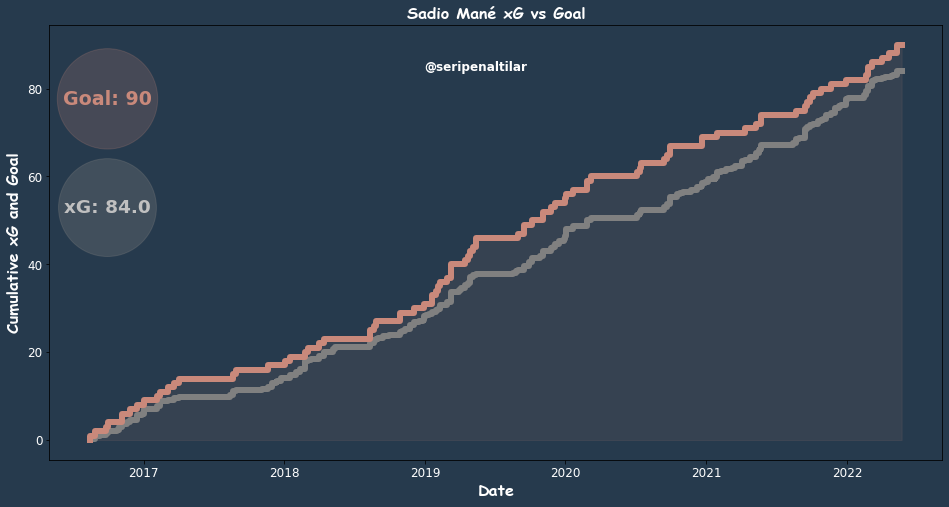

In [189]:
xg(df=mane,player='Sadio Mané')

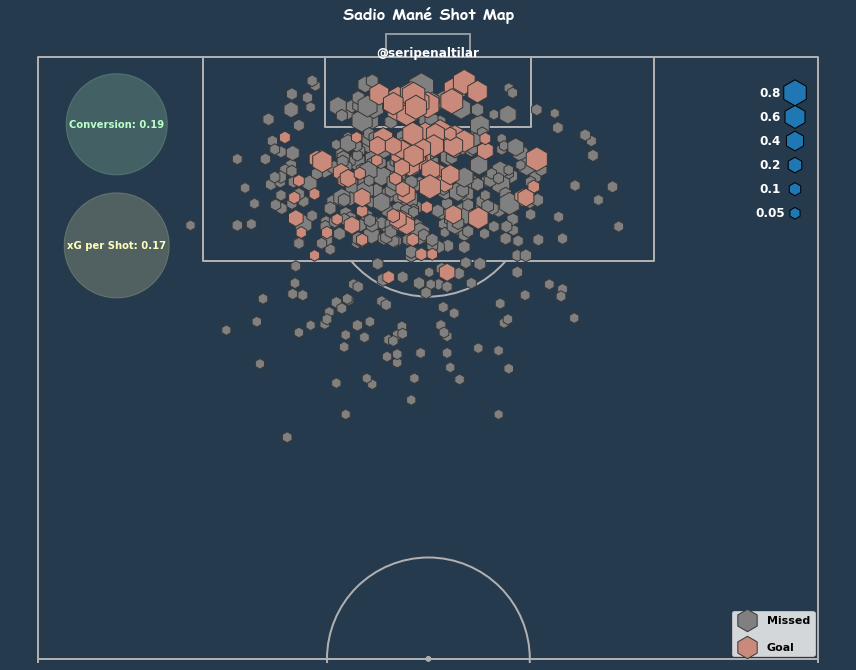

In [265]:
shotmap(df=mane,player='Sadio Mané')

In [193]:
mane[mane['result']=='Goal']['situation'].value_counts()

OpenPlay      83
FromCorner     6
SetPiece       1
Name: situation, dtype: int64

In [195]:
mane[mane['result']=='Goal']['shotType'].value_counts()

RightFoot    52
LeftFoot     24
Head         14
Name: shotType, dtype: int64

In [288]:
#gol 90,asist 90,sut 90,xG 90, conversion, xG pber shot

### Wout Weghorst

In [290]:
seasons = [2018,2019,2020,2021]

In [291]:
wego_bl = season(player='Wout Weghorst',team='Wolfsburg',league='Bundesliga')

In [293]:
pl_seasons = [2021]

In [294]:
wego_pl = season(player='Wout Weghorst',team='Burnley',league='EPL',seasons=pl_seasons)

In [297]:
wego = pd.concat([wego_bl,wego_pl])

In [300]:
wego['xg_cumulative'] = wego['xG'].cumsum()

In [302]:
wego['goal_cumulative'] = wego['goal'].cumsum()

### xG and Shotmap

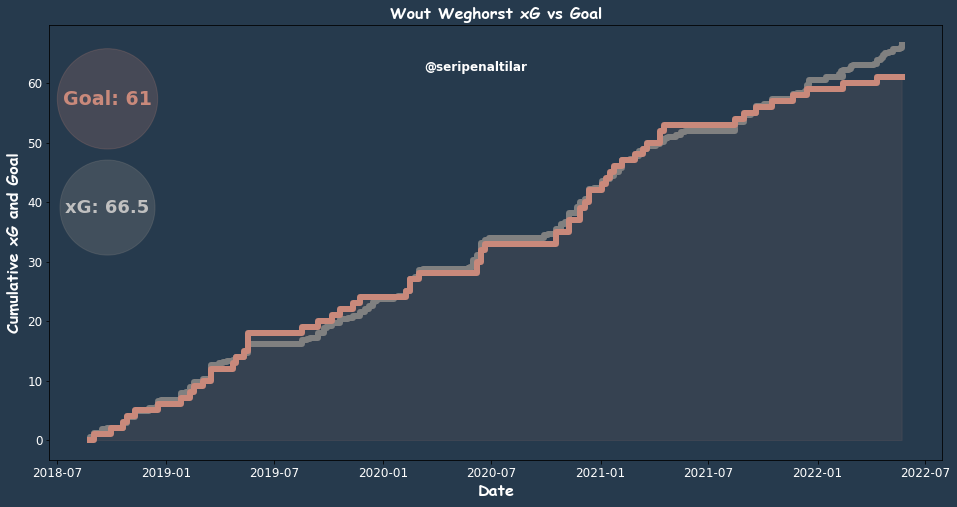

In [304]:
xg(df=wego,player='Wout Weghorst')

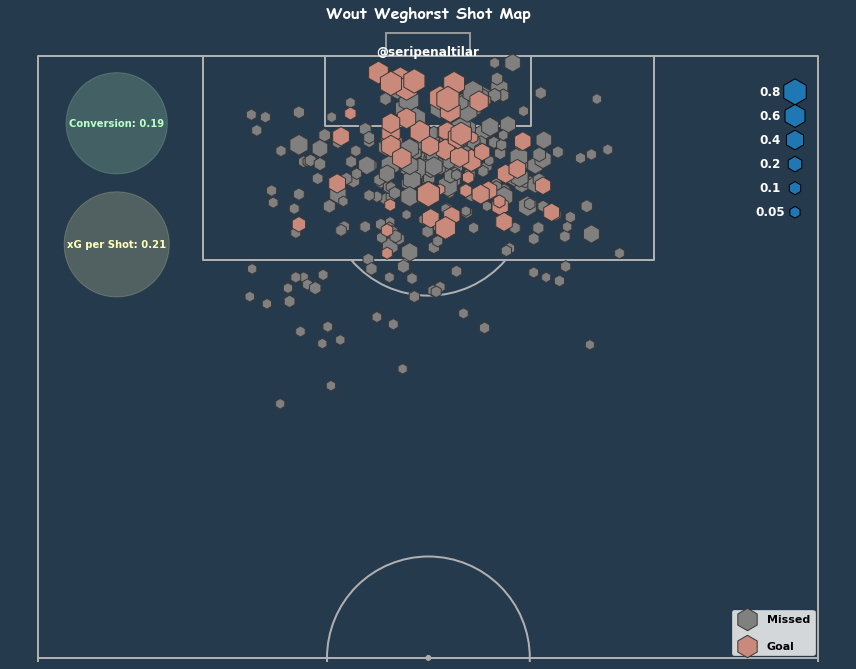

In [305]:
shotmap(df=wego,player='Wout Weghorst')

### Assists

In [341]:
seasons = [2018,2019,2020,2021]

In [342]:
wolf = pd.DataFrame()
for x in seasons:
    df_wolf = understat.season('Bundesliga', x, team='Wolfsburg')
    wolf = wolf.append(df_wolf)

In [344]:
burn = understat.season('EPL', 2021, team='Burnley')

In [353]:
wb = pd.concat([wolf,burn])

In [348]:
wb = wb[(wb['result']=='Goal') & (wb['player_assisted']=='Wout Weghorst')]

In [355]:
wb = wb[wb['player_assisted']=='Wout Weghorst']

In [356]:
wb[['X','Y','xG']] = wb[['X','Y','xG']].apply(pd.to_numeric,axis=1)
wb['date'] = pd.to_datetime(wb['date'])
wb['goal'] = np.where(wb['result']=='Goal',1,0)
wb['goal_cumulative'] = wb['goal'].cumsum()
wb[['X','Y']] = wb[['X','Y']]*100

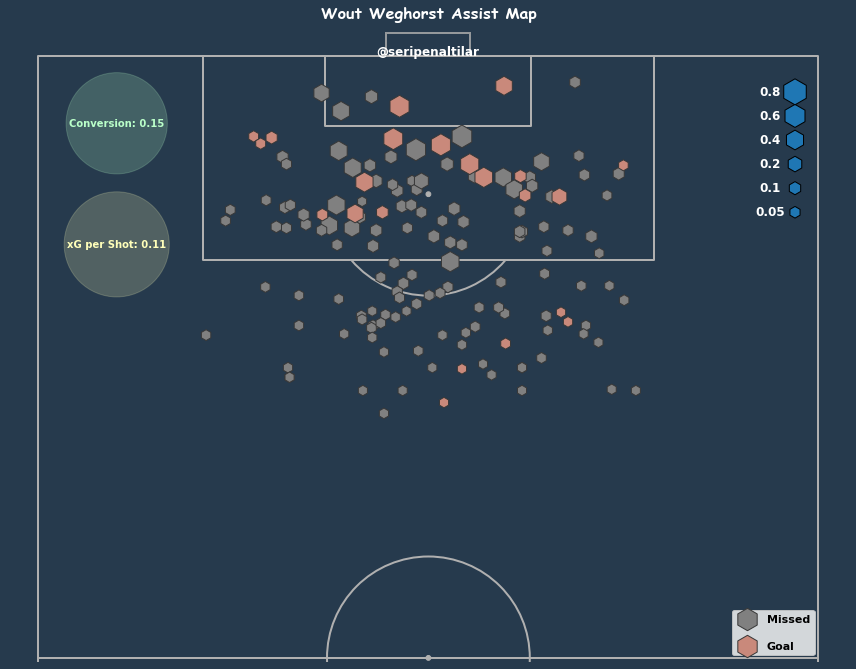

In [361]:
shotmap(df=wb,player='Wout Weghorst')

### Press vs xG per Shot

In [382]:
#scraping matchlog from fbref

def matchlog(filepath):
    df = pd.read_html(filepath)[0]
    column_lst = list(df.columns)
    for index in range(len(column_lst)):
        column_lst[index] = column_lst[index][1]
        
    df.columns = column_lst
    df = df.fillna('0')
    df = df.apply(pd.to_numeric, errors='ignore')
    return df

In [386]:
weg18 = matchlog('https://fbref.com/en/players/c4e87b8b/matchlogs/2018-2019/summary/Wout-Weghorst-Match-Logs')
weg19 = matchlog('https://fbref.com/en/players/c4e87b8b/matchlogs/2019-2020/summary/Wout-Weghorst-Match-Logs')
weg20 = matchlog('https://fbref.com/en/players/c4e87b8b/matchlogs/2020-2021/summary/Wout-Weghorst-Match-Logs')
weg21 = matchlog('https://fbref.com/en/players/c4e87b8b/matchlogs/2021-2022/summary/Wout-Weghorst-Match-Logs')

In [783]:
weglog = pd.concat([weg18,weg19,weg20,weg21])

In [784]:
weglog = weglog.drop(weglog[weglog.Date == "0"].index)
weglog = weglog.drop(weglog[weglog.Press == "On matchday squad, but did not play"].index)
weglog = weglog.drop(weglog[weglog.Press == "0"].index)
weglog = weglog.drop(weglog[weglog.Press == 0.0].index)

In [785]:
weglog.columns

Index(['Date', 'Day', 'Comp', 'Round', 'Venue', 'Result', 'Squad', 'Opponent',
       'Start', 'Pos', 'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY',
       'CrdR', 'Touches', 'Press', 'Tkl', 'Int', 'Blocks', 'xG', 'npxG', 'xA',
       'SCA', 'GCA', 'Cmp', 'Att', 'Cmp%', 'Prog', 'Carries', 'Prog', 'Succ',
       'Att', 'Match Report'],
      dtype='object')

In [639]:
#weglog = weglog.iloc[:,10:-1]

In [786]:
weglog = weglog[['Press','npxG','Sh','PKatt','Gls','Min','SoT','Carries','Cmp%','Touches','SCA']]

In [787]:
weglog = weglog.apply(pd.to_numeric)

In [788]:
weglog = weglog[weglog['Min']>=45]

In [789]:
weglog['np Shot'] = weglog['Sh'] - weglog['PKatt']

In [790]:
weglog['npxG per Shot'] = weglog['npxG'] / weglog['np Shot']

In [791]:
weglog[weglog.isna().any(axis=1)]

,Press,npxG,Sh,PKatt,Gls,Min,SoT,Carries,Cmp%,Touches,SCA,np Shot,npxG per Shot
10,25.0,0.0,0.0,0,0,90,0.0,18.0,79.2,33.0,1.0,0.0,NaN
12,25.0,0.0,0.0,0,0,90,0.0,18.0,50.0,31.0,0.0,0.0,NaN
26,42.0,0.0,0.0,0,0,90,0.0,20.0,85.7,37.0,0.0,0.0,NaN
33,28.0,0.0,0.0,0,0,83,0.0,19.0,73.3,20.0,1.0,0.0,NaN
8,24.0,0.0,0.0,0,0,59,0.0,15.0,72.2,25.0,2.0,0.0,NaN
44,32.0,0.0,0.0,0,0,90,0.0,15.0,66.7,20.0,2.0,0.0,NaN
8,24.0,0.0,0.0,0,0,65,0.0,10.0,63.6,22.0,0.0,0.0,NaN
22,20.0,0.0,0.0,0,0,90,0.0,13.0,85.7,30.0,2.0,0.0,NaN
31,23.0,0.0,0.0,0,0,90,0.0,28.0,68.6,44.0,1.0,0.0,NaN
40,14.0,0.0,0.0,0,0,66,0.0,17.0,78.9,26.0,0.0,0.0,NaN


In [792]:
weglog['npxG per Shot'] = weglog['npxG per Shot'].fillna(0)

In [793]:
weglog.reset_index(inplace=True)

In [794]:
del weglog['index']

In [795]:
weglog['Sh%'] = weglog['SoT'] / weglog['Sh'] * 100
weglog['Sh%'] = weglog['Sh%'].fillna(0)

In [796]:
weglog['Conversion'] = weglog['Gls'] / weglog['Sh']

In [797]:
weglog['Conversion'] = weglog['Conversion'].fillna(0)

In [798]:
weglog

,Press,npxG,Sh,PKatt,Gls,Min,SoT,Carries,Cmp%,Touches,SCA,np Shot,npxG per Shot,Sh%,Conversion
0,31.0,0.4,3.0,0,0,90,1.0,26.0,55.6,36.0,1.0,3.0,0.133333,33.333333,0.000000
1,20.0,1.1,3.0,0,1,90,1.0,13.0,57.1,25.0,1.0,3.0,0.366667,33.333333,0.333333
2,27.0,0.3,2.0,1,1,90,1.0,26.0,80.8,38.0,3.0,1.0,0.300000,50.000000,0.500000
3,25.0,0.0,0.0,0,0,90,0.0,18.0,79.2,33.0,1.0,0.0,0.000000,0.000000,0.000000
4,11.0,0.5,3.0,1,1,90,2.0,20.0,70.4,32.0,7.0,2.0,0.250000,66.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,13.0,0.1,1.0,0,0,55,0.0,14.0,64.3,22.0,2.0,1.0,0.100000,0.000000,0.000000
88,29.0,0.3,1.0,0,1,90,1.0,30.0,76.7,45.0,1.0,1.0,0.300000,100.000000,1.000000
89,12.0,0.1,1.0,0,0,59,0.0,14.0,63.6,24.0,3.0,1.0,0.100000,0.000000,0.000000
90,31.0,0.2,3.0,0,0,90,0.0,33.0,60.6,48.0,3.0,3.0,0.066667,0.000000,0.000000


### Heat Map

In [799]:
weglog.rename(columns={'SoT':'Shots on Target','Cmp%':'Pass Accuracy %','Sh':'Shots','SCA':'Shot Creating Action','Gls':'Goals'},inplace=True)

In [800]:
weglog.drop(['PKatt','Min','Sh%','np Shot'],axis=1,inplace=True)

In [801]:
len(weglog)

92

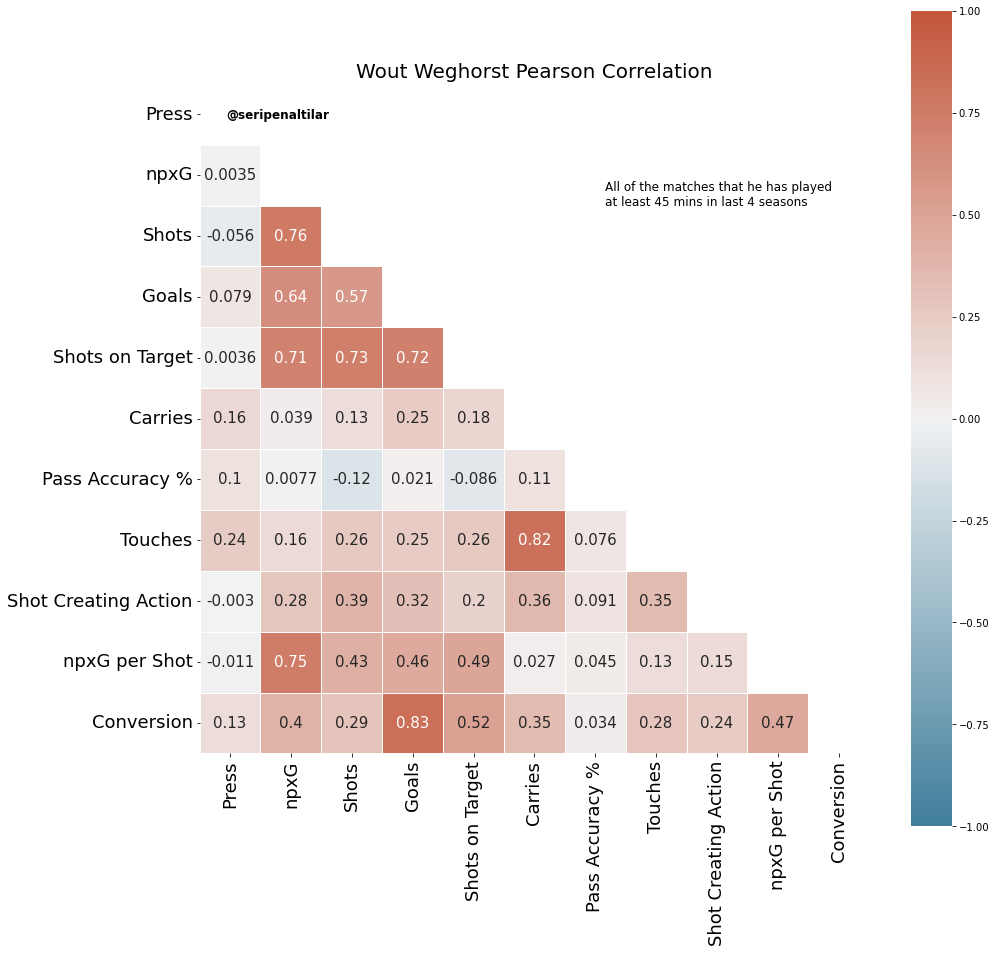

In [980]:
corr = weglog.corr()
f, ax = plt.subplots(figsize=(15,15))
#f.patch.set_facecolor('#263a4d')
#ax.set_facecolor(color='#263a4d')
mask = np.triu(np.ones_like(corr,dtype=bool))
cmap = sns.diverging_palette(230,20,as_cmap=True)
heat = sns.heatmap(corr,mask=mask,cmap=cmap,linewidths=.5,square=True,vmin=-1,vmax=1,annot=True,
                   annot_kws={"size":15})
heat.set_xticklabels(heat.get_xmajorticklabels(), fontsize = 18)
heat.set_yticklabels(heat.get_ymajorticklabels(), fontsize = 18)
plt.title('Wout Weghorst Pearson Correlation',fontsize=20)
plt.figtext(0.15,0.78,"@seripenaltilar",fontsize=12,fontweight='bold')
plt.figtext(0.50,0.70,"All of the matches that he has played\nat least 45 mins in last 4 seasons",fontsize=12)
plt.show()

### Forwards Press per 90 and Goals per 90

In [658]:
def readfromhtml(filepath):
    df = pd.read_html(filepath)[0]
    column_lst = list(df.columns)
    for index in range(len(column_lst)):
        column_lst[index] = column_lst[index][1]
        
    df.columns = column_lst
    df.drop(df[df['Player'] == 'Player'].index, inplace=True)
    df = df.fillna('0')
    df.set_index('Rk', drop=True, inplace=True)
    try:
        df['Comp'] = df['Comp'].apply(lambda x: ' '.join(x.split()[1:]))
        df['Nation'] = df['Nation'].astype(str)
        df['Nation'] = df['Nation'].apply(lambda x: x.split()[-1])
    except:
        print('Error in uploading file:' + filepath)
    finally:
        df = df.apply(pd.to_numeric, errors='ignore')
        return df

In [1047]:
fbref = readfromhtml('https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats')

In [1048]:
fbref = fbref[['Player','Pos','90s','Gls']]

In [1049]:
fbref['Pos'].unique()

array(['DF', 'MF', 'FW', 'MF,FW', 'FW,MF', 'GK', 'DF,MF', 'FW,DF',
       'MF,DF', 'DF,FW', 'GK,MF'], dtype=object)

In [1050]:
fbref = fbref[(fbref['Pos']=='FW,MF') | (fbref['Pos']=='FW')]

In [1051]:
fbref = fbref.groupby('Player')[['90s','Gls']].sum()
fbref = fbref[fbref['90s']>=10.0]

In [1052]:
fbref.reset_index(inplace=True)

In [1053]:
dfnc = readfromhtml('https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats')

In [1054]:
dfnc = dfnc[['Player','Pos','90s','Press']]
dfnc = dfnc[(dfnc['Pos']=='FW,MF') | (dfnc['Pos']=='FW')]
dfnc = dfnc.groupby('Player')[['90s','Press']].sum()
dfnc.reset_index(inplace=True)

In [1055]:
dfnc = dfnc[dfnc['90s']>=10.0]

In [1056]:
dfnc.reset_index(inplace=True)

In [1057]:
dfnc['90s'].sum()

7240.1

In [1058]:
fbref['90s'].sum()

7240.1

In [1059]:
res = pd.merge(fbref,dfnc,on=['Player','90s'])

In [1060]:
res['Goals per 90'] = res['Gls'] / res['90s']
res['Press per 90'] = res['Press'] / res['90s']

In [1061]:
res = res[res['Gls']!=0]

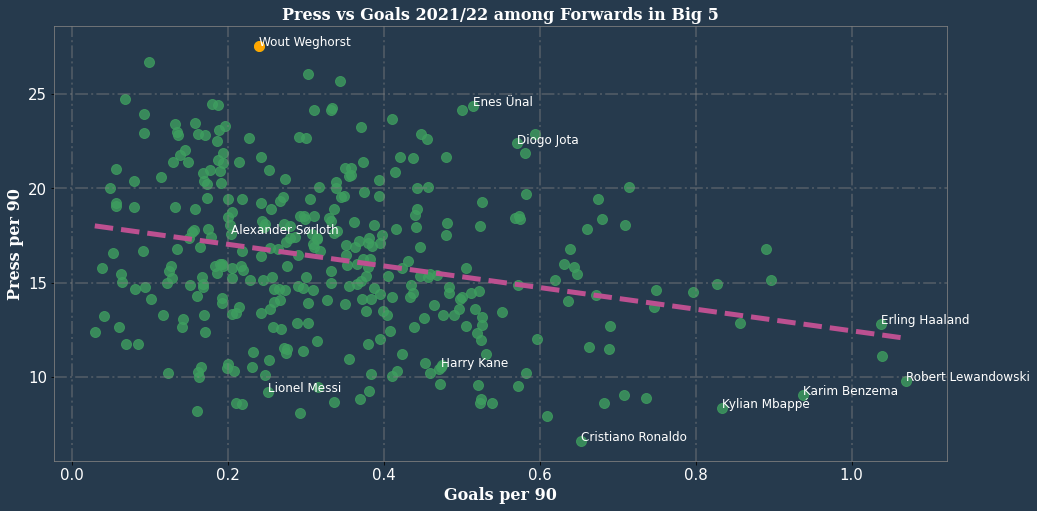

In [1063]:
fig, ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#263a4d')

sns.regplot(res['Goals per 90'],res['Press per 90'],ci=None,scatter_kws={"color": "#3e9e5f",'s':100}, line_kws={"color": "#bc5090",'lw':5,'linestyle':'--'},
            ax=ax)

ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 2,
            alpha = 0.4)
ax.set_facecolor(color='#263a4d')

font = {'family': 'serif',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }

ax.set_xlabel('Goals per 90', fontdict=font)
ax.set_ylabel('Press per 90', fontdict=font)
ax.spines[['left','bottom','right','top']].set_color('grey')
#ax.spines['bottom'].set_color('white')


ax.scatter(res[res['Player']=='Wout Weghorst']['Goals per 90'],res[res['Player']=='Wout Weghorst']['Press per 90'],c='#ffa600',s=100)
ax.annotate('Wout Weghorst',(res[res['Player']=='Wout Weghorst']['Goals per 90'],res[res['Player']=='Wout Weghorst']['Press per 90']),c='white',size=12)
ax.annotate('Robert Lewandowski',(res[res['Player']=='Robert Lewandowski']['Goals per 90'],res[res['Player']=='Robert Lewandowski']['Press per 90']),c='white',size=12)
ax.annotate('Harry Kane',(res[res['Player']=='Harry Kane']['Goals per 90'],res[res['Player']=='Harry Kane']['Press per 90']),c='white',size=12)
ax.annotate('Erling Haaland',(res[res['Player']=='Erling Haaland']['Goals per 90'],res[res['Player']=='Erling Haaland']['Press per 90']),c='white',size=12)
ax.annotate('Alexander Sørloth',(res[res['Player']=='Alexander Sørloth']['Goals per 90'],res[res['Player']=='Alexander Sørloth']['Press per 90']),c='white',size=12)
ax.annotate('Cristiano Ronaldo',(res[res['Player']=='Cristiano Ronaldo']['Goals per 90'],res[res['Player']=='Cristiano Ronaldo']['Press per 90']),c='white',size=12)
ax.annotate('Enes Ünal',(res[res['Player']=='Enes Ünal']['Goals per 90'],res[res['Player']=='Enes Ünal']['Press per 90']),c='white',size=12)
ax.annotate('Lionel Messi',(res[res['Player']=='Lionel Messi']['Goals per 90'],res[res['Player']=='Lionel Messi']['Press per 90']),c='white',size=12)
ax.annotate('Kylian Mbappé',(res[res['Player']=='Kylian Mbappé']['Goals per 90'],res[res['Player']=='Kylian Mbappé']['Press per 90']),c='white',size=12)
ax.annotate('Diogo Jota',(res[res['Player']=='Diogo Jota']['Goals per 90'],res[res['Player']=='Diogo Jota']['Press per 90']),c='white',size=12)
ax.annotate('Karim Benzema',(res[res['Player']=='Karim Benzema']['Goals per 90'],res[res['Player']=='Karim Benzema']['Press per 90']),c='white',size=12)


plt.xticks(fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')
plt.title('Press vs Goals 2021/22 among Forwards in Big 5',fontdict=font)


plt.show()

In [ ]:
#1-bundesligada 90 dakika basina gol ve asist katkisi + asist
#2-npxG vs goals per 90
#3-conversion vs goals per 90
#özellikle pres konusuna bakalim

In [998]:
def attack(df):
    df = df[['Player','Pos','90s','Gls']]
    df = df[(df['Pos']=='FW,MF') | (df['Pos']=='FW')]
    df = df.groupby('Player')[['90s','Gls']].sum()
    df.reset_index(inplace=True)
    return df

In [1004]:
df_2020 = readfromhtml('https://fbref.com/en/comps/Big5/2020-2021/shooting/players/2020-2021-Big-5-European-Leagues-Stats')
df_2019 = readfromhtml('https://fbref.com/en/comps/Big5/2019-2020/shooting/players/2019-2020-Big-5-European-Leagues-Stats')
df_2018 = readfromhtml('https://fbref.com/en/comps/Big5/2018-2019/shooting/players/2018-2019-Big-5-European-Leagues-Stats')

In [1005]:
df_2020 = attack(df=df_2020)
df_2019 = attack(df=df_2019)
df_2018 = attack(df=df_2018)

In [1011]:
last3 = pd.concat([df_2020,df_2019,df_2018])

In [1012]:
last3 = last3.groupby('Player')[['90s','Gls']].sum()

In [1015]:
last3.reset_index(inplace=True)

In [1017]:
last3 = last3[last3['90s']>=30]

In [1019]:
def press(press):
    press = press[['Player','Pos','90s','Press']]
    press = press[(press['Pos']=='FW,MF') | (press['Pos']=='FW')]
    press = press.groupby('Player')[['90s','Press']].sum()
    press.reset_index(inplace=True)
    return press

In [1023]:
p2020 = readfromhtml('https://fbref.com/en/comps/Big5/2020-2021/defense/players/2020-2021-Big-5-European-Leagues-Stats')
p2019 = readfromhtml('https://fbref.com/en/comps/Big5/2019-2020/defense/players/2019-2020-Big-5-European-Leagues-Stats')
p2018 = readfromhtml('https://fbref.com/en/comps/Big5/2018-2019/defense/players/2018-2019-Big-5-European-Leagues-Stats')

In [1024]:
p2020 = press(press=p2020)
p2019 = press(press=p2019)
p2018 = press(press=p2018)

In [1028]:
press3 = pd.concat([p2020,p2019,p2018])

In [1030]:
press3 = press3.groupby('Player')[['90s','Press']].sum()

In [1031]:
press3.reset_index(inplace=True)
press3 = press3[press3['90s']>=30]

In [1064]:
res = pd.merge(last3,press3,on=['Player','90s'])

In [1065]:
res['Goals per 90'] = res['Gls'] / res['90s']
res['Press per 90'] = res['Press'] / res['90s']

In [1066]:
res = res[res['Gls']!=0]

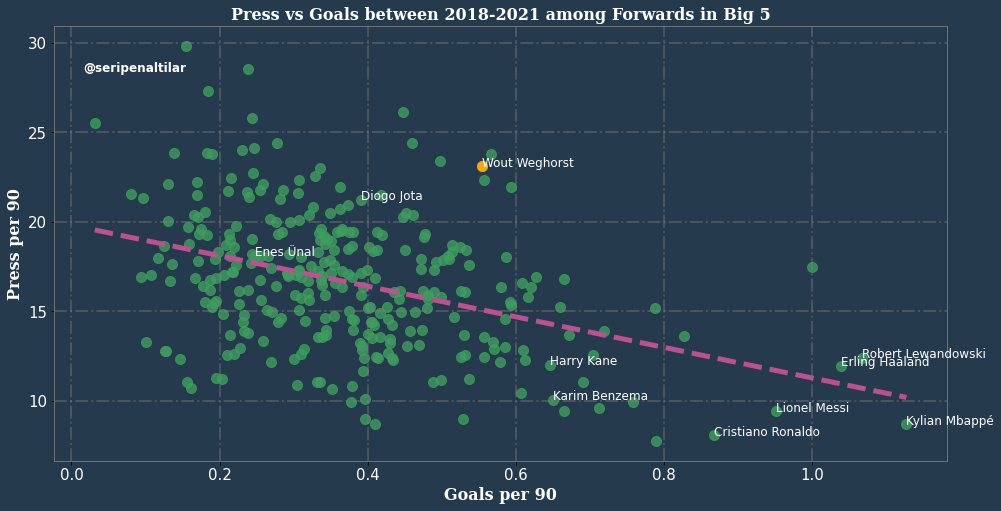

In [1084]:
fig, ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#263a4d')

sns.regplot(res['Goals per 90'],res['Press per 90'],ci=None,scatter_kws={"color": "#3e9e5f",'s':100}, line_kws={"color": "#bc5090",'lw':5,'linestyle':'--'},
            ax=ax)

ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 2,
            alpha = 0.4)
ax.set_facecolor(color='#263a4d')

font = {'family': 'serif',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }

ax.set_xlabel('Goals per 90', fontdict=font)
ax.set_ylabel('Press per 90', fontdict=font)
ax.spines[['left','bottom','right','top']].set_color('grey')
#ax.spines['bottom'].set_color('white')


ax.scatter(res[res['Player']=='Wout Weghorst']['Goals per 90'],res[res['Player']=='Wout Weghorst']['Press per 90'],c='#ffa600',s=100)
ax.annotate('Wout Weghorst',(res[res['Player']=='Wout Weghorst']['Goals per 90'],res[res['Player']=='Wout Weghorst']['Press per 90']),c='white',size=12)
ax.annotate('Robert Lewandowski',(res[res['Player']=='Robert Lewandowski']['Goals per 90'],res[res['Player']=='Robert Lewandowski']['Press per 90']),c='white',size=12)
ax.annotate('Harry Kane',(res[res['Player']=='Harry Kane']['Goals per 90'],res[res['Player']=='Harry Kane']['Press per 90']),c='white',size=12)
ax.annotate('Erling Haaland',(res[res['Player']=='Erling Haaland']['Goals per 90'],res[res['Player']=='Erling Haaland']['Press per 90']),c='white',size=12)
#ax.annotate('Alexander Sørloth',(res[res['Player']=='Alexander Sørloth']['Goals per 90'],res[res['Player']=='Alexander Sørloth']['Press per 90']),c='white',size=12)
ax.annotate('Cristiano Ronaldo',(res[res['Player']=='Cristiano Ronaldo']['Goals per 90'],res[res['Player']=='Cristiano Ronaldo']['Press per 90']),c='white',size=12)
ax.annotate('Enes Ünal',(res[res['Player']=='Enes Ünal']['Goals per 90'],res[res['Player']=='Enes Ünal']['Press per 90']),c='white',size=12)
ax.annotate('Lionel Messi',(res[res['Player']=='Lionel Messi']['Goals per 90'],res[res['Player']=='Lionel Messi']['Press per 90']),c='white',size=12)
ax.annotate('Kylian Mbappé',(res[res['Player']=='Kylian Mbappé']['Goals per 90'],res[res['Player']=='Kylian Mbappé']['Press per 90']),c='white',size=12)
ax.annotate('Diogo Jota',(res[res['Player']=='Diogo Jota']['Goals per 90'],res[res['Player']=='Diogo Jota']['Press per 90']),c='white',size=12)
ax.annotate('Karim Benzema',(res[res['Player']=='Karim Benzema']['Goals per 90'],res[res['Player']=='Karim Benzema']['Press per 90']),c='white',size=12)


plt.xticks(fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')
plt.title('Press vs Goals between 2018-2021 among Forwards in Big 5',fontdict=font)
plt.figtext(0.15,0.80,"@seripenaltilar",fontsize=12,fontweight='bold',color='white')


plt.show()

In [1082]:
res[res.Player=='Wout Weghorst']

,Player,90s,Gls,Press,Goals per 90,Press per 90
295,Wout Weghorst,95.6,53,2209,0.554393,23.106695
